## Introduction

<img src = 'https://miro.medium.com/max/771/1*UJ2VWq1WqOOUL6Zm81slyg.jpeg'>

We usually use photoshop and other photo editing software to color the grayscale image. Here, we are going to use special type of deep learning architecture called autoencoder. Autoencoder consist of two type of neural network called encoder and decoder .
Encoder learns the representation of the data and reduce it's dimenion while decoder use this reduces data to generate new data.
Encoder are generally used for anamoly detection, denoising image, colorizing the images.
Here, i am  going to colorize the landscape images, i am  using same images for training and testing purpose as i have only 47 images of colored and grayscaled landscape images,becuse of this the network might have high accuracy.

## Import Necessary Libraries

In [66]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator,img_to_array
from skimage.color import rgb2lab,lab2rgb
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

### To get the landscape images serially

In [67]:
import re
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)  

### Getting image and appending image array to empty list

In [68]:
SIZE = 256
color_img = []
path = '/content/drive/MyDrive/image_colorization/color'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    img = cv2.imread(path + '/'+i,1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #resizing image
    img = cv2.resize(img, (SIZE, SIZE))
    img = img.astype('float32') / 255.0
    color_img.append(img_to_array(img))

gray_img = []
path = '/content/drive/MyDrive/image_colorization/grayscale'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    img = cv2.imread(path + '/'+i,1)
    
    #resizing image
    img = cv2.resize(img, (SIZE, SIZE))
    img = img.astype('float32') / 255.0
    gray_img.append(img_to_array(img))    

100%|██████████| 47/47 [00:00<00:00, 327.56it/s]


# Visualizing our training images

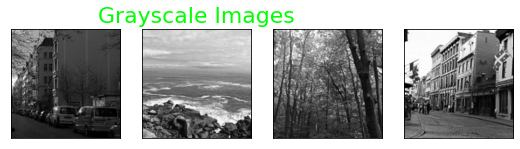

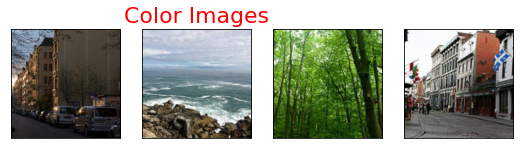

In [103]:
plt.figure(figsize = (9,9))
for i in range(4): 
    if i == 2:
        plt.title("Grayscale Images", color = 'lime', fontsize = 22)
    plt.subplot(1,4,i+1)
    plt.imshow(gray_img[i])
    plt.xticks([])
    plt.yticks([])
plt.show()
plt.figure(figsize = (9,9))
for i in range(4): 
    if i == 2:
        plt.title("Color Images", color = 'red', fontsize = 22)
    plt.subplot(1,4,i+1)
    plt.imshow(color_img[i])
    plt.xticks([])
    plt.yticks([])
     

### Reshaping our array so that we can fed it to the network

In [70]:
gray_img = np.reshape(gray_img,(len(gray_img),SIZE,SIZE,3))
color_img = np.reshape(color_img, (len(color_img),SIZE,SIZE,3))

### Defining our model

In [71]:
model = Sequential()
# encoder layer
model.add(Conv2D(64,(3,3), input_shape = (SIZE,SIZE,3),strides = 2,activation = 'relu',padding = 'same'))
model.add(Conv2D(128,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(128,(3,3),activation = 'relu',padding = 'same', strides = 2))
model.add(Conv2D(256,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(256,(3,3),activation = 'relu',padding = 'same', strides = 2))
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(256,(3,3),activation = 'relu',padding = 'same'))


model.add(Conv2D(128,(3,3),activation = 'relu',padding = 'same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',padding = 'same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(16,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(3,(3,3),activation = 'relu',padding = 'same'))
model.add(UpSampling2D((2,2)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 512)       1180160   
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 512)      

### Compiling and fitting model

In [82]:

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_squared_error',
              metrics = ['acc'])
model.fit(gray_img, color_img, epochs = 1000,batch_size = 30)

Epoch 1/1000
2/2 [==============================] - 0s 204ms/step - loss: 0.4235 - acc: 0.6041
Epoch 2/1000
2/2 [==============================] - 0s 197ms/step - loss: 0.1182 - acc: 0.2201
Epoch 3/1000
2/2 [==============================] - 0s 198ms/step - loss: 0.1377 - acc: 0.4166
Epoch 4/1000
2/2 [==============================] - 0s 197ms/step - loss: 0.1322 - acc: 0.4658
Epoch 5/1000
2/2 [==============================] - 0s 197ms/step - loss: 0.1185 - acc: 0.4689
Epoch 6/1000
2/2 [==============================] - 0s 195ms/step - loss: 0.0839 - acc: 0.4710
Epoch 7/1000
2/2 [==============================] - 0s 197ms/step - loss: 0.0395 - acc: 0.5044
Epoch 8/1000
2/2 [==============================] - 0s 195ms/step - loss: 0.0293 - acc: 0.3929
Epoch 9/1000
2/2 [==============================] - 0s 198ms/step - loss: 0.0294 - acc: 0.3483
Epoch 10/1000
2/2 [==============================] - 0s 196ms/step - loss: 0.0240 - acc: 0.3354
Epoch 11/1000
2/2 [==============================

## Plotting our original images along with predicted images 

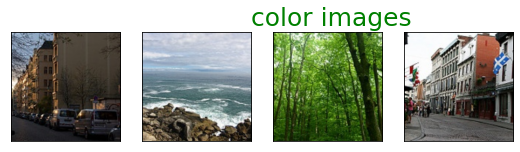

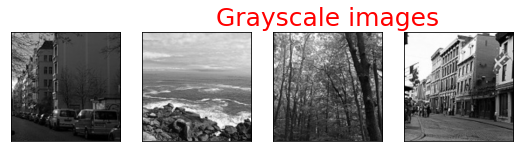

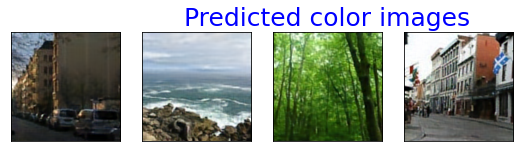

In [100]:
plt.figure(figsize = (9,9))
for i in range(4): 
    plt.subplot(1,4,i+1)
    if i == 2:
           plt.title(' color images', fontsize = 25, color = 'Green') 
    plt.imshow(color_img[i])
    plt.xticks([])
    plt.yticks([])
plt.show()
plt.figure(figsize = (9,9))
for i in range(4): 
    plt.subplot(1,4,i+1)
    if i == 2:
           plt.title('Grayscale images', fontsize = 25, color = 'Red') 
    plt.imshow(gray_img[i])
    plt.xticks([])
    plt.yticks([])
plt.show()
plt.figure(figsize = (9,9))

for i in range(4): 
    plt.subplot(1,4,i+1)
    if i == 2:
           plt.title('Predicted color images', fontsize = 25, color = 'Blue') 
    plt.imshow(np.clip(model.predict(gray_img[i].reshape(1,256,256,3)).reshape(256,256,3),0.0,1.0))
    plt.yticks([]) 
    plt.xticks([])   
     